In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import high_corr_drop as hcd

In [23]:
data=pd.read_csv("./data/World Happiness Report.csv")


# Data Preprocessing

In [24]:
data.head(10) 

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

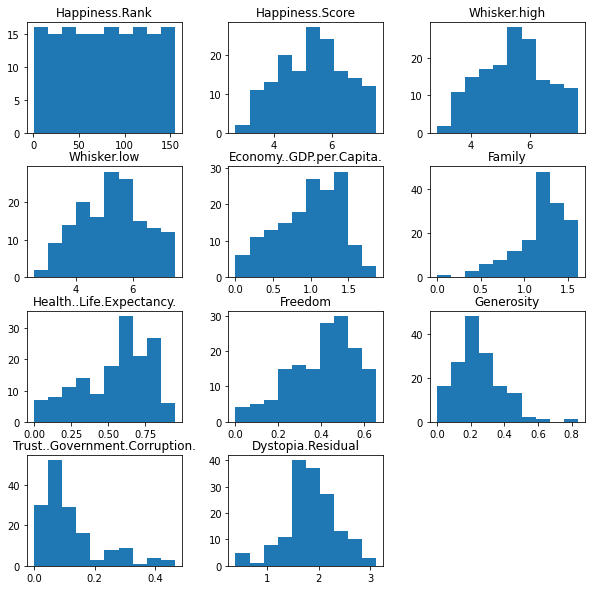

In [26]:
# Let's see how the features vary
histograms = data.hist(grid=False, figsize=(10, 10))

We see that columns-['Economy..GDP.per.Capita.' , 'Freedom' , 'Health..Life.Expectancy.'] have almost same distribution.

In [27]:
# We will drop the features we don't need
data.drop(['Country','Happiness.Rank'],axis=1,inplace=True)

In [28]:
correlation_matrix=data.corr().abs()
correlation_matrix

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Score,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,0.019011,0.350944,0.024226
Family,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,0.155256,0.155462,0.154904,0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,0.116627
Trust..Government.Corruption.,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,0.022755
Dystopia.Residual,0.475355,0.478824,0.471505,0.024226,0.070506,0.054963,0.081926,0.116627,0.022755,1.000000


In [29]:
# As the correlation between 'Happiness.score' and 'Whishker.high', 'Wishker.low' is almost close to 1, We will drop the later ones
data=hcd.drop_high_corr_columns(data,correlation_matrix)

In [30]:
# Seperating Dependent and Independent variables
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [31]:
# Let's, apply Z-score normalization to our data 
scaler=StandardScaler()
scaled_values=scaler.fit_transform(X.values)
X=pd.DataFrame(scaled_values,index=X.index,columns=X.columns)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [33]:
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

## Training our model

In [37]:
from sklearn.linear_model import LinearRegression


In [38]:
lg=LinearRegression()

In [39]:
lg.fit(x_train,y_train)

LinearRegression()

In [40]:
lg.score(x_test,y_test)

0.999999915211966

In [42]:
y_pred=lg.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.999999915211966

## We Got 99% accuracy from our model on the test set.